In [1]:
%pylab inline
import LFPy

Populating the interactive namespace from numpy and matplotlib
Failed to setup nrnpy_pr


/home/ben/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
simplecellParameters = {
    'morphology' : 'simple_pyrtypeC_LFPy.hoc',
    'tstart' : -50,
    'tstop' : 1000,
    'dt' : 2**-4,
}

excSynapseParameters = {
    'syntype' : 'Exp2Syn',
    'e' : -20,
    'tau1' : 0.5,
    'tau2' : 2.0,
    'weight' : 0.009,
    'record_current' : True,
}

inhSynapseParameters = {
    'syntype' : 'Exp2Syn',
    'e' : -70,
    'tau1' : 0.5,
    'tau2' : 5.0,
    'weight' : 0.003,
    'record_current' : True,
}

z = mgrid[-400:1201:100]
electrodeParameters = {
    'x' : zeros(z.size),
    'y' : zeros(z.size),
    'z' : z,
    'sigma' : 0.3,
}

In [3]:
# Cell 1
simplecell = LFPy.Cell(**simplecellParameters)
simplecell.set_pos(x=-250, y=0, z=0)
simplecell.set_rotation(z=np.pi)


synapse_soma = LFPy.Synapse(simplecell,
                       idx = simplecell.get_closest_idx(x=-250,z=0),
                       **inhSynapseParameters)

synapse_axon = LFPy.Synapse(simplecell,
                       idx = simplecell.get_closest_idx(x=-202.5,z=0),
                       **excSynapseParameters)

synapse_dend = LFPy.Synapse(simplecell,
                       idx = simplecell.get_closest_idx(x=-202.5,z=500),
                       **excSynapseParameters)

synapse_soma.set_spike_times(array([602,606,610,614,618,622,702,706,710,714,718,722]))
synapse_axon.set_spike_times(array([100,102,104,600,604,608,612,616,620,624]))
synapse_dend.set_spike_times(array([700,704,708,712,716,720,724]))
                        

electrode = LFPy.RecExtElectrode(**electrodeParameters)

In [4]:
import neuron
def record_axon(Cell):
    """
    Record membrane potentials for axonal segments
    """
    axonvreclist = neuron.h.List()
    for sec in Cell.allseclist:
        if ~sec.name().find('axon'):
            memvrec = neuron.h.Vector(int(Cell.tstop / Cell.dt+1))
            memvrec.record(sec(0.5)._ref_v, Cell.dt)
            axonvreclist.append(memvrec)
    return axonvreclist


axonvlist = record_axon(simplecell)

simplecell.simulate(electrode=electrode)

"\nsubplot(223)\nfor sec in LFPy.cell.neuron.h.allsec():\n    idx = detailedcell.get_idx(sec.name())\n    plot(np.r_[detailedcell.xstart[idx], detailedcell.xend[idx][-1]],\n            np.r_[detailedcell.zstart[idx], detailedcell.zend[idx][-1]],\n            color='k')\nplot(-250,0,color='black',marker='o',markersize=10,label='soma')\nplot([detailedcell.synapses[0].x], [detailedcell.synapses[0].z],      color='r', marker='o', markersize=5,label='synapse')\nplot(electrode.x, electrode.z, '.', marker='o', color='g',label='electrodes')\n\nxlabel('distance (um)')\nlegend()\naxis([-500, 50, -150, 400])\n\nsubplot(224)\npcolormesh(detailedcell.tvec, electrode.z, electrode.LFP,\n           vmin=-abs(electrode.LFP).max(), vmax=abs(electrode.LFP).max(),\n           cmap='inferno'), colorbar(), title('LFP (mV)')\nylabel('distance(um)')\nxlabel('time(ms)')\n"

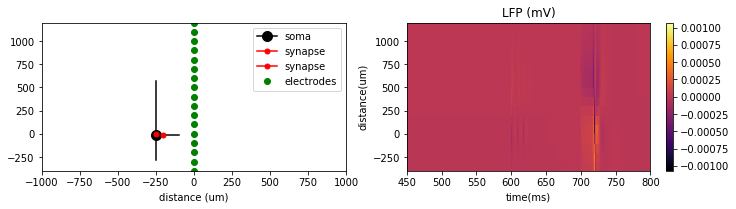

In [5]:
figure(figsize=(12, 6))
subplot(221)
for sec in LFPy.cell.neuron.h.allsec():
    idx = simplecell.get_idx(sec.name())
    plot(np.r_[simplecell.xstart[idx], simplecell.xend[idx][-1]],
            np.r_[simplecell.zstart[idx], simplecell.zend[idx][-1]],
            color='k')
plot(-250,-10,color='black',marker='o',markersize=10,label='soma')
plot([simplecell.synapses[0].x], [simplecell.synapses[0].z], \
     color='r', marker='o', markersize=5,label='synapse')
plot([simplecell.synapses[1].x], [simplecell.synapses[1].z], \
     color='r', marker='o', markersize=5,label='synapse')
plot(electrode.x, electrode.z, '.', marker='o', color='g',label='electrodes')

xlabel('distance (um)')
legend()
axis([-1000, 1000, -400, 1200])

subplot(222)
pcolormesh(simplecell.tvec, electrode.z, electrode.LFP,
           vmin=-abs(electrode.LFP).max(), vmax=abs(electrode.LFP).max(),
           cmap='inferno'), colorbar(), title('LFP (mV)')
ylabel('distance(um)')
xlabel('time(ms)')
xlim(450,800)

'''
subplot(223)
for sec in LFPy.cell.neuron.h.allsec():
    idx = detailedcell.get_idx(sec.name())
    plot(np.r_[detailedcell.xstart[idx], detailedcell.xend[idx][-1]],
            np.r_[detailedcell.zstart[idx], detailedcell.zend[idx][-1]],
            color='k')
plot(-250,0,color='black',marker='o',markersize=10,label='soma')
plot([detailedcell.synapses[0].x], [detailedcell.synapses[0].z], \
     color='r', marker='o', markersize=5,label='synapse')
plot(electrode.x, electrode.z, '.', marker='o', color='g',label='electrodes')

xlabel('distance (um)')
legend()
axis([-500, 50, -150, 400])

subplot(224)
pcolormesh(detailedcell.tvec, electrode.z, electrode.LFP,
           vmin=-abs(electrode.LFP).max(), vmax=abs(electrode.LFP).max(),
           cmap='inferno'), colorbar(), title('LFP (mV)')
ylabel('distance(um)')
xlabel('time(ms)')
'''

#savefig('LFPy-example-2.pdf', dpi=300)

Text(0.5,0,'time(ms)')

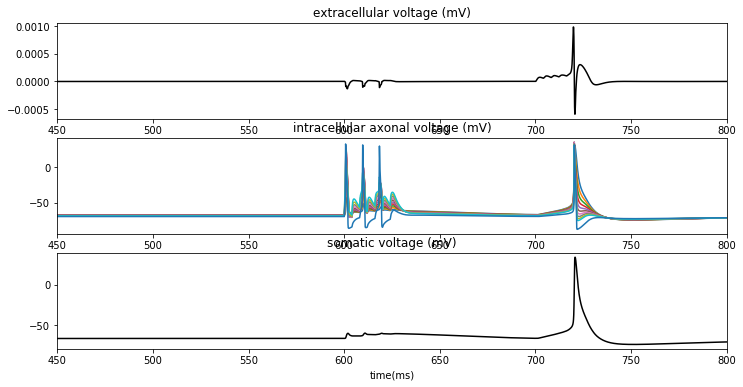

In [6]:
figure(figsize=(12, 6))
subplot(3,1,1)
plot(simplecell.tvec,electrode.LFP[4,:],'k')
title('extracellular voltage (mV)')
xlim(450,800)
#text(500,-0.0005,'^Syn. at dend.')
#text(700,-0.0005,'^Syn. at axon')

subplot(3,1,2)
for x in axonvlist:
    y = np.array(x)
    plot(simplecell.tvec,y,label='{}'.format(x))
    title('intracellular axonal voltage (mV)')
    xlim(450,800)
    
subplot(3,1,3)
plot(simplecell.tvec, simplecell.somav, 'k'), title('somatic voltage (mV)')
xlim(450,800)
xlabel('time(ms)')

#subplot(211)
#plot(simplecell.tvec, synapse_simp.i, 'r'), title('synaptic current (pA)')
#subplot(212)
